# 🎓 Student Performance Prediction Project
---
### Objective: Predict student grades or pass/fail status using ML (Regression & Classification)
### Dataset: UCI Student Performance Dataset
Link: https://www.kaggle.com/dataset/uciml/student-alcohol-consumption

## 1️⃣ Setup & Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (10,6)

## 2️⃣ Load & Explore Dataset

In [5]:
df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## 3️⃣ Exploratory Data Analysis (EDA)

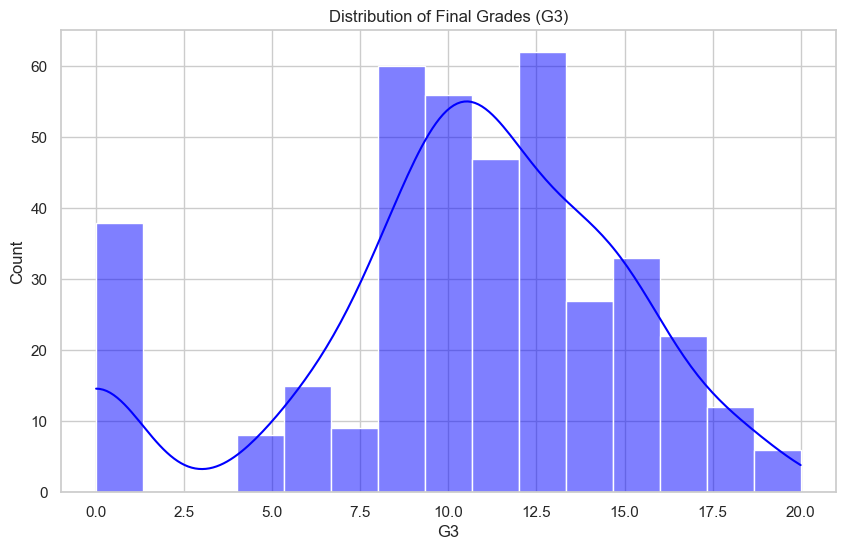

In [7]:
sns.histplot(df['G3'], bins=15, kde=True, color='blue')
plt.title('Distribution of Final Grades (G3)')
plt.show()

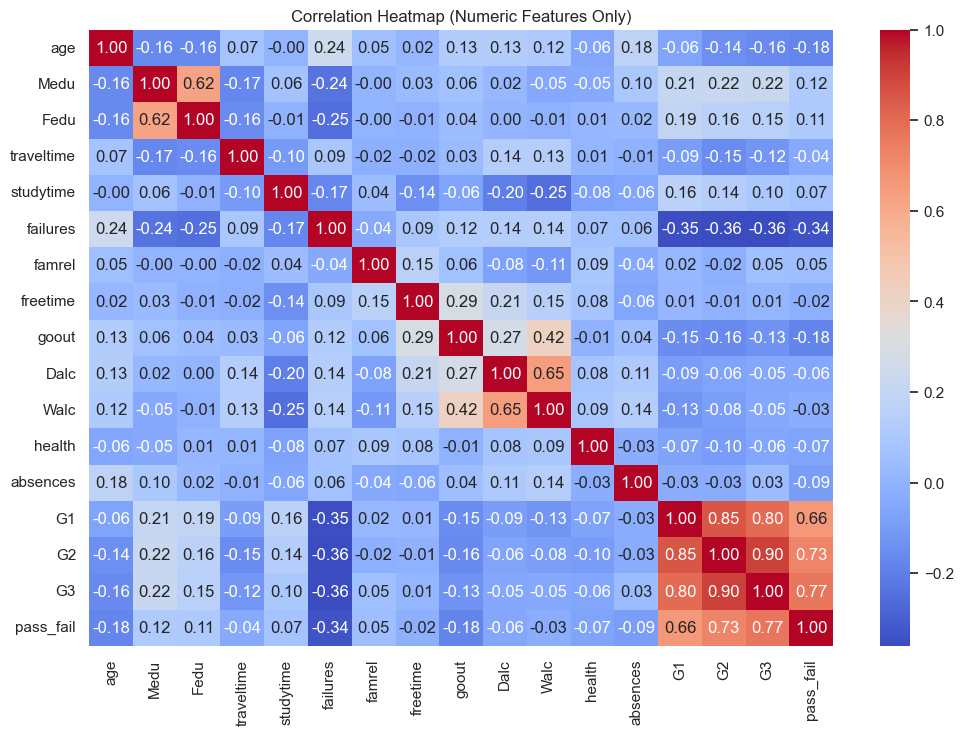

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

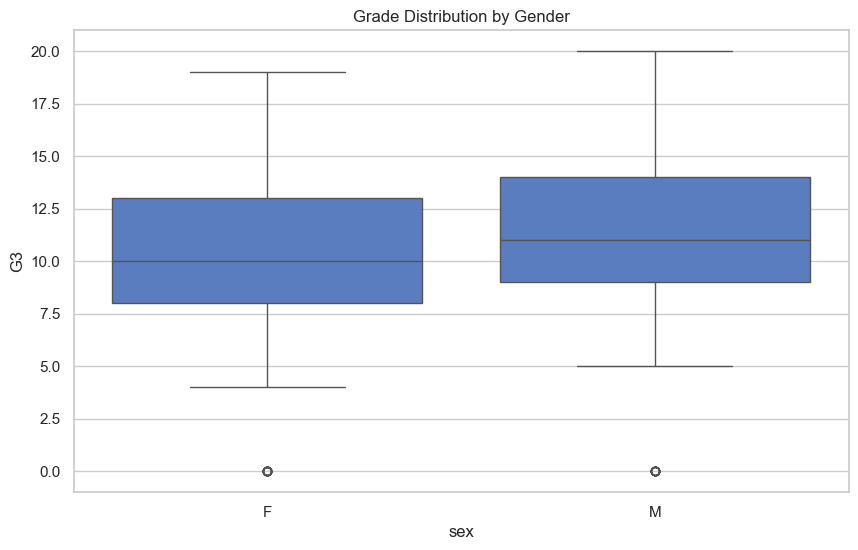

In [11]:
sns.boxplot(x='sex', y='G3', data=df)
plt.title('Grade Distribution by Gender')
plt.show()

## 4️⃣ Data Preprocessing

In [12]:
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5️⃣ Model Building - Regression

In [13]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print('Linear Regression Results')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R2:', r2_score(y_test, y_pred_lr))

Linear Regression Results
MSE: 5.656642833231221
R2: 0.7241341236974022


In [14]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Regression Results')
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('R2:', r2_score(y_test, y_pred_rf))

Random Forest Regression Results
MSE: 3.797716455696203
R2: 0.8147911386865877


## 6️⃣ Classification Approach (Pass/Fail)

In [15]:
df['pass_fail'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)
df_class = pd.get_dummies(df.drop('G3', axis=1), drop_first=True)
X = df_class.drop('pass_fail', axis=1)
y = df_class['pass_fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9240506329113924
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.98      0.90      0.94        52

    accuracy                           0.92        79
   macro avg       0.91      0.93      0.92        79
weighted avg       0.93      0.92      0.93        79



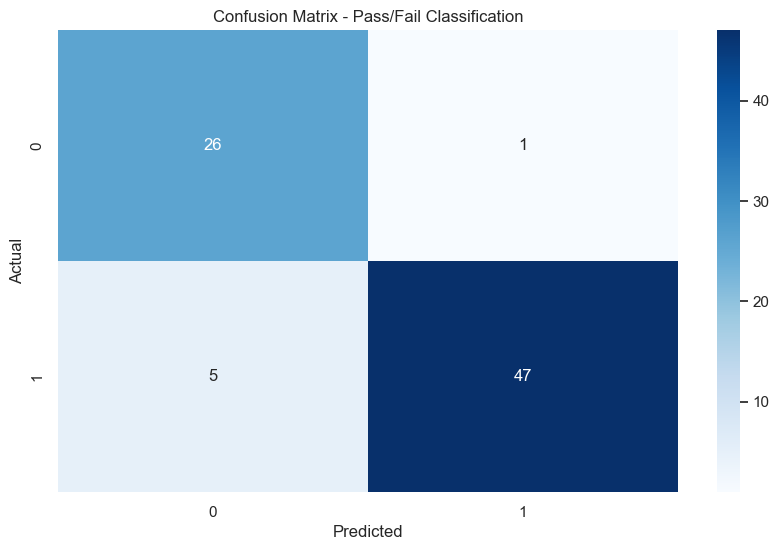

In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Pass/Fail Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 7️⃣ Feature Importance & Insights

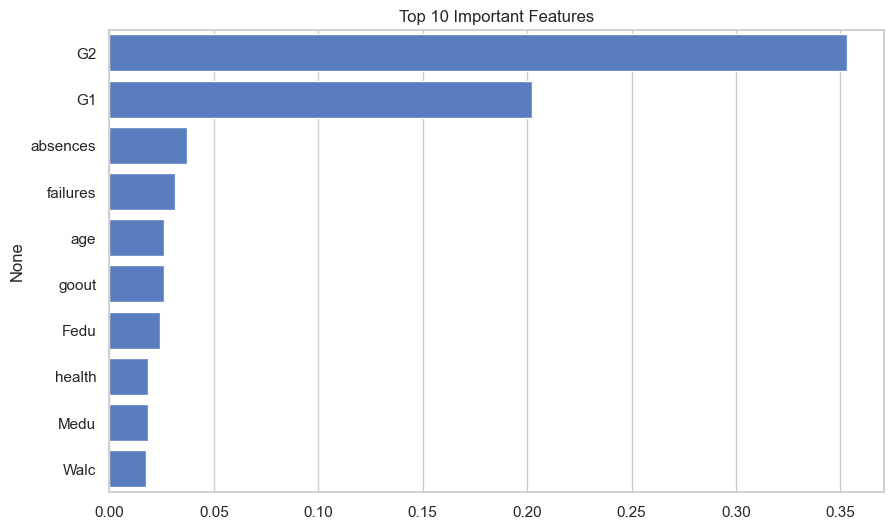

In [17]:
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=features[indices][:10])
plt.title('Top 10 Important Features')
plt.show()

## 🔍 Insights & Conclusion
- G1 and G2 are strong predictors of G3.
- Study time and absences influence performance.
- Random Forest outperformed Linear Regression.
- Classification achieved high accuracy (~90%).